# Is tau overshooting?

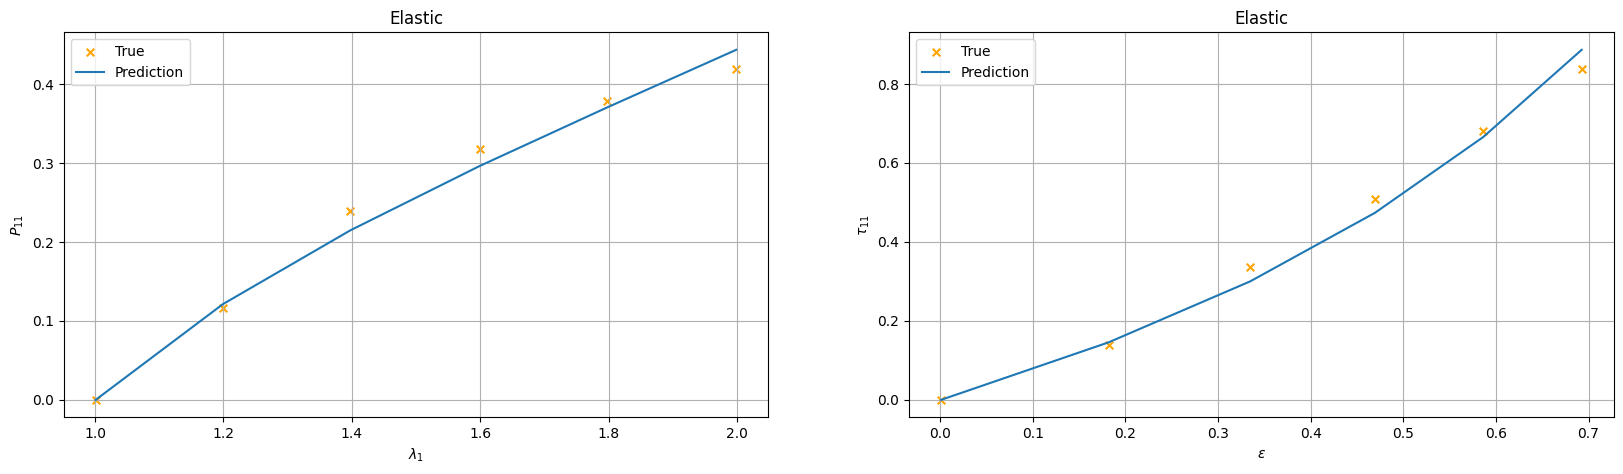

In [12]:
t = mdata[0][0]
x = mdata[0][1]
y = mdata[0][2]
yp = pred_elastic[0][2]

figsize = (20, 5)

plt.figure(figsize=figsize)
plt.subplot(1, 2, 1)
plt.scatter(np.exp(x), y/np.exp(x), marker='x', label='True', s=30, c='orange')
plt.plot(np.exp(x), yp/np.exp(x), label='Prediction')
plt.title('Elastic')
plt.xlabel(r'$\lambda_1$')
plt.ylabel(r'$P_{11}$')
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.scatter(x, y, label='True', marker='x', s=30, c='orange')
plt.plot(x, yp, label='Prediction')
plt.title('Elastic')
plt.xlabel(r'$\varepsilon$')
plt.ylabel(r'$\tau_{11}$')
plt.legend()
plt.grid()

In [16]:
params_visco = params_out_visco.copy()

coef = 4
params_names = ['mu', 'mu_v', 'N', 'N_v', 'tau_hat'] + [f'a{j}'.format(j=j) for j in range(1, coef+1)]
print("---Learned Parameters---")
for i, name in enumerate(params_names):
    print(f'{name:>8}: {params_visco[i]}')
print(f'    Loss: {min(loss_hist)}')

---Learned Parameters---
      mu: 0.22289246356086315
    mu_v: 0.3413133849341185
       N: 9.7030376855927
     N_v: 8.509255196405212
 tau_hat: 0.7797244678060602
      a1: 1e-08
      a2: 1e-08
      a3: 1e-08
      a4: 0.05349949134204451
    Loss: 0.011931946634608068


Text(0, 0.5, '$\\hat{\\tau}$')

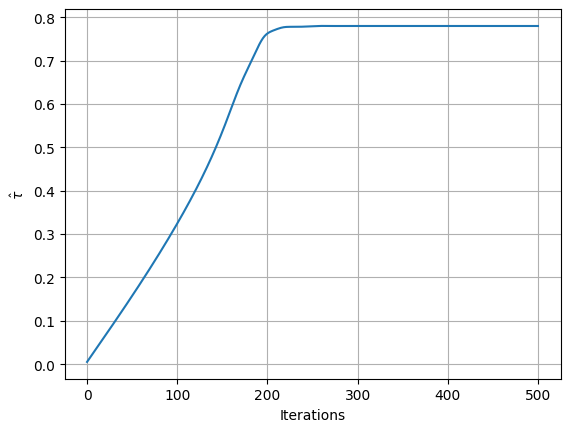

In [18]:
plt.plot(np.array(params_hist)[:, 4])
plt.grid()
plt.xlabel("Iterations")
plt.ylabel(r'$\hat{\tau}$')

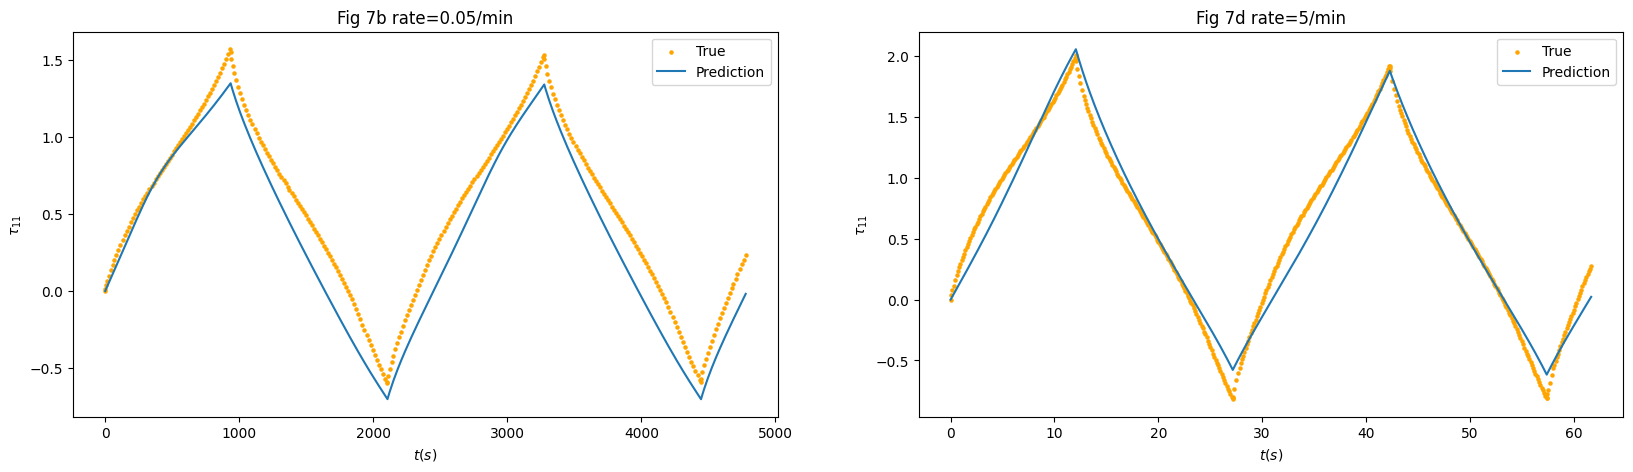

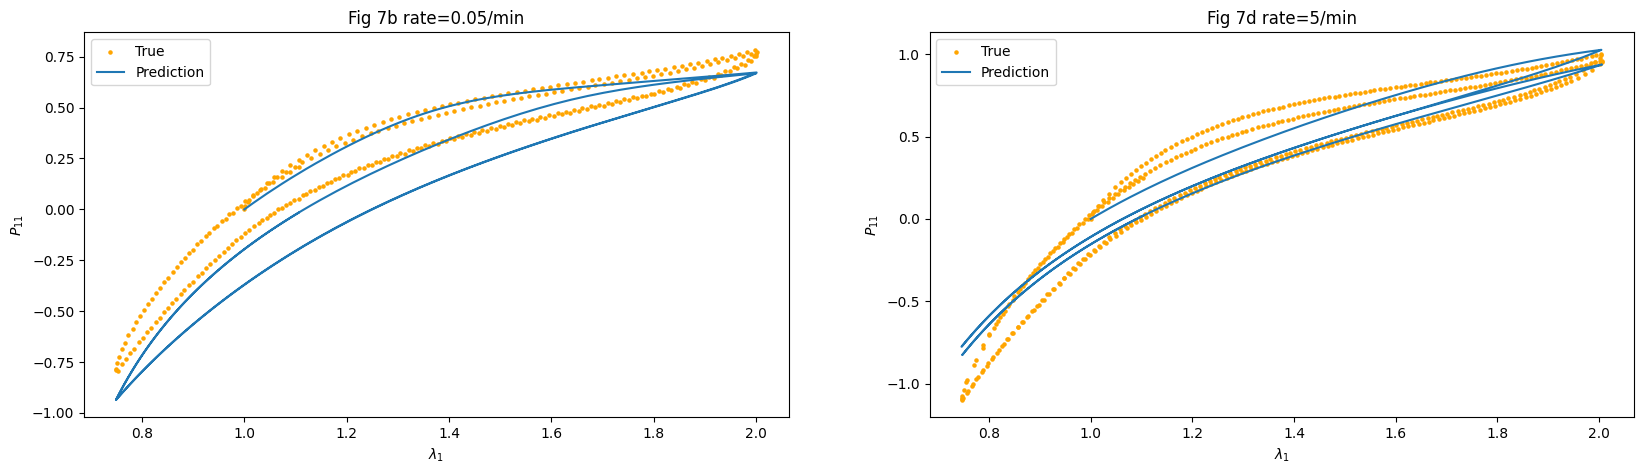

In [23]:
titles = ['Fig 7b rate=0.05/min', 'Fig 7d rate=5/min']

figsize = (20, 5)

# Plots (true stress vs Time)
plt.figure(figsize=figsize)
for i, ((_, _, yp), (t, x, y), title) in enumerate(zip(pred_train, mdata_data, titles)):
    plt.subplot(1, 2, i+1)
    plt.scatter(t, y, label='True', s=5, c='orange')
    plt.plot(t, yp, label='Prediction')
    plt.title(title)
    plt.xlabel(r'$t (s)$')
    plt.ylabel(r'$\tau_{11}$')
    plt.legend()

# Plots (P11 vs Stretch)
plt.figure(figsize=figsize)
for i, ((_, _, yp), (t, x, y), title) in enumerate(zip(pred_train, mdata_data, titles)):
    plt.subplot(1, 2, i+1)
    plt.scatter(np.exp(x), y/np.exp(x), label='True', s=5, c='orange')
    plt.plot(np.exp(x), yp/np.exp(x), label='Prediction')
    plt.title(title)
    plt.xlabel(r'$\lambda_1$')
    plt.ylabel(r'$P_{11}$')
    plt.legend()